## Exercise 4.9 - Gambler's Problem

Implement value iteration for the gambler’s problem and solve it for $p_h = 0.25$ and $p_h = 0.55$.
In programming, you may ﬁnd it convenient to introduce two dummy states corresponding to
termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your
results graphically, as in Figure 4.3. Are your results stable as $\theta \rightarrow 0$?

In [2]:
! pip3 -q install numpy matplotlib gym

In [3]:
import matplotlib
import matplotlib.pyplot as plt

from mdp import value_iteration
from gambler import GamblersProblem

### Gambler's Problem MDP

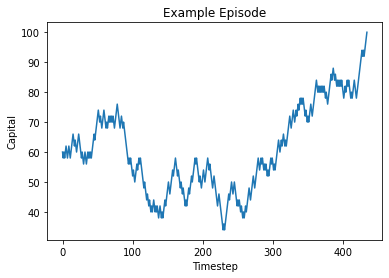

In [4]:
mdp = GamblersProblem(p_win=0.5)
mdp.reset()

capitals = []
done = False
while not done:
    bet = 1
    capital, reward, done, info = mdp.step(bet)
    capitals += [capital]

plt.figure()
plt.title("Example Episode")
plt.xlabel("Timestep")
plt.ylabel("Capital")
plt.plot(capitals)


### Reproduction of Figure 4.3

In [5]:
matplotlib.rcParams['figure.figsize'] = [10, 5]


def plot_results(value, policy):    
    if value is not None:
        plt.figure()
        plt.title("Value Function")
        plt.xlabel("Capital")
        plt.ylabel("Win Probability")
        plt.bar(range(len(value)), value)

    if policy is not None:
        plt.figure()
        plt.title("Policy")
        plt.xlabel("Capital")
        plt.ylabel("Bet")
        plt.bar(range(len(policy)), policy + 1)

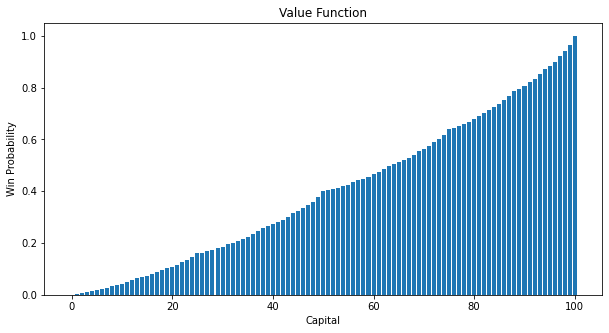

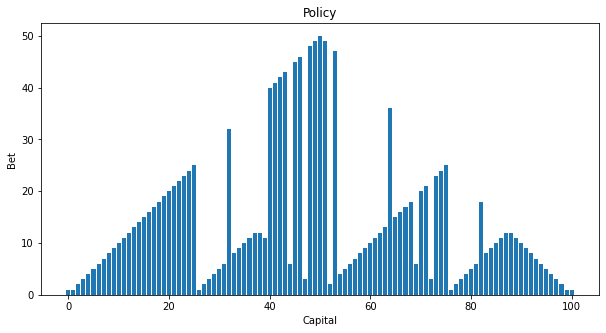

In [10]:
mdp = GamblersProblem(p_win=0.4)
value, policy = value_iteration(mdp)
plot_results(value, policy)

### Win Probability $p_h = 0.25$

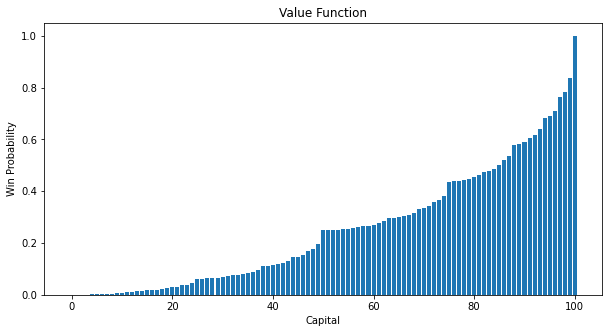

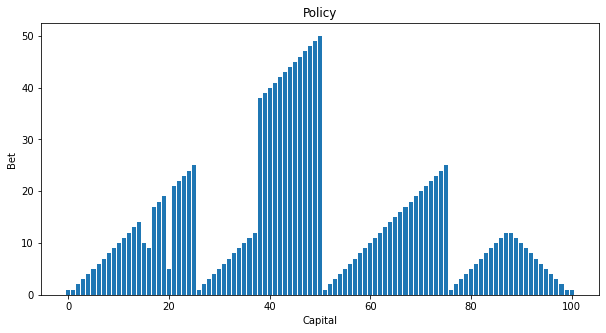

In [7]:
mdp = GamblersProblem(p_win=0.25)
value, policy = value_iteration(mdp)
plot_results(value, policy)

### Win Probability $p_h = 0.55$

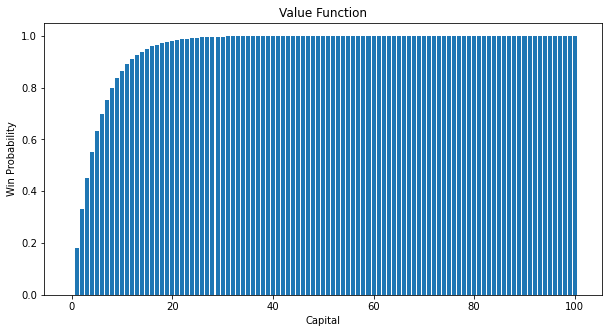

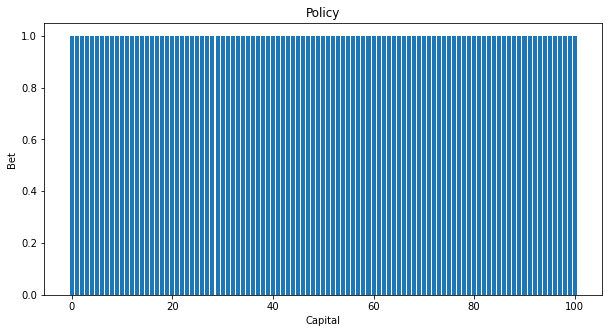

In [8]:
mdp = GamblersProblem(p_win=0.55)
value, policy = value_iteration(mdp)
plot_results(value, policy)

### Stability of Results as $ \theta \rightarrow 0$

Results are stable across a reasonable large range of tolerance but there's a few tricks along the
way here.

First, the policy extraction part of the algorithm rounds of the expected returns to a finite
accuracy. Since `np.argmax` returns the lowest index when there are ties, this stabilizes the
returned policy by shielding it from numerical errors and noise. The differences between the value
function of different actions are very small. Especially nearby the "peak" 25, 50 and 75 bets 
the neighbors are on the edge of numerical precision of 32 bit floats.

Second, the version of `GamblersProblem` MDP used here doesn't allow 0 bets. I'm not sure if it
is a _bug_ in the book or not. Allowing 0 bet formally violates the convergence guarantees of
the Value Iteration algorithm because an episode of the MDP may never terminate. The experiments
here suggest that this doesn't have any effect on the optimal policy because the results are the
same as in the book. Chances are that the reference implementation used by authors has an 
_anti-bug_ that avoids the 0 bet and effectively cancels the never-ending feature of the MDP.
The problem also makes sense intuitively. For a coin heavily biased against the gambler, 0 bets
may be a viable strategy to extend the episode indefinitely and avoid going bust.

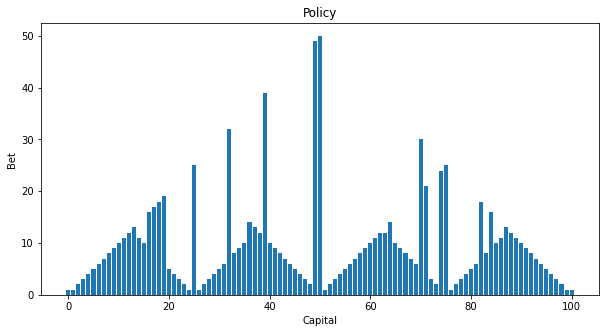

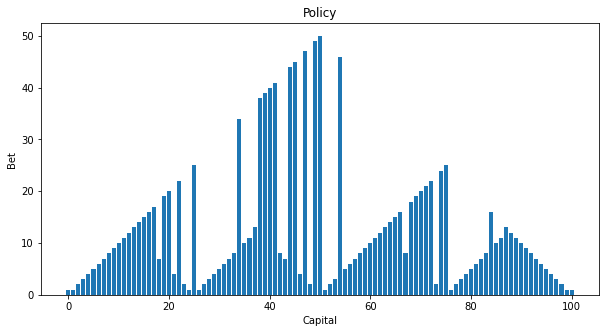

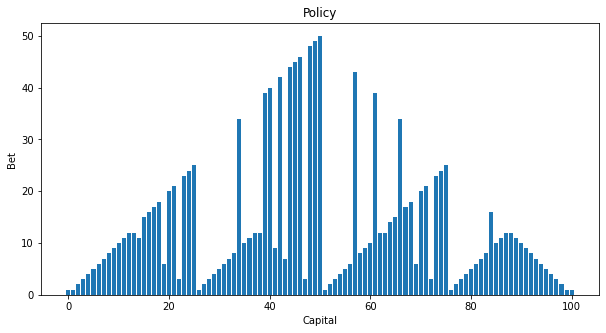

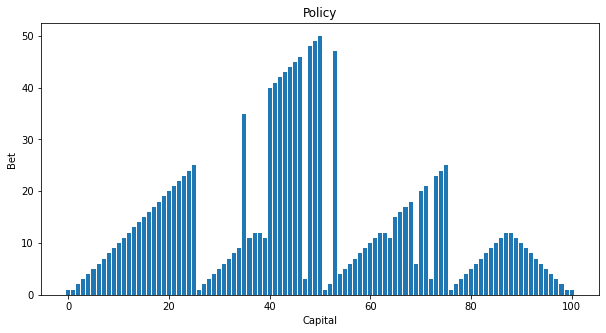

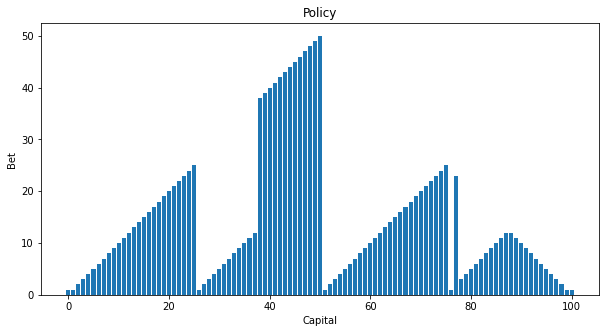

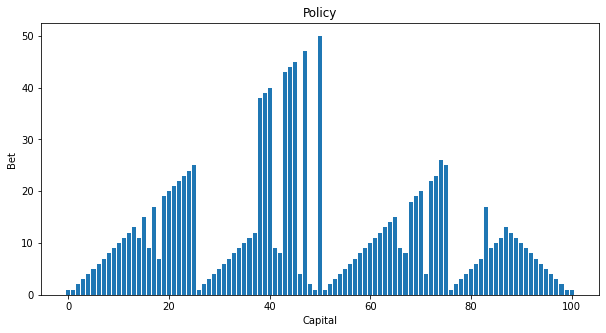

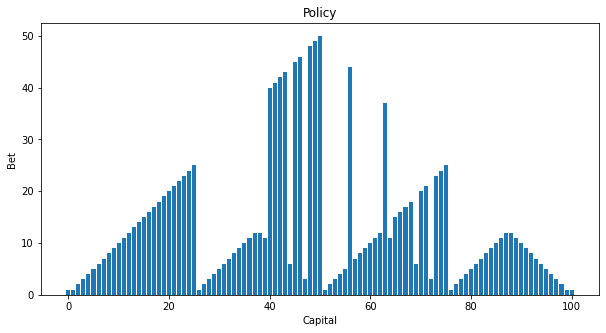

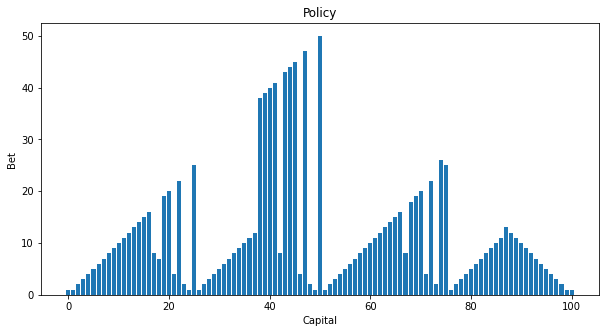

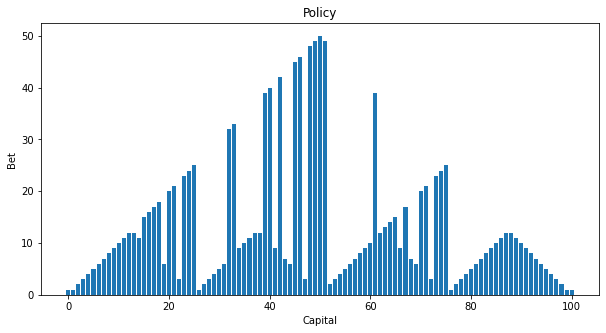

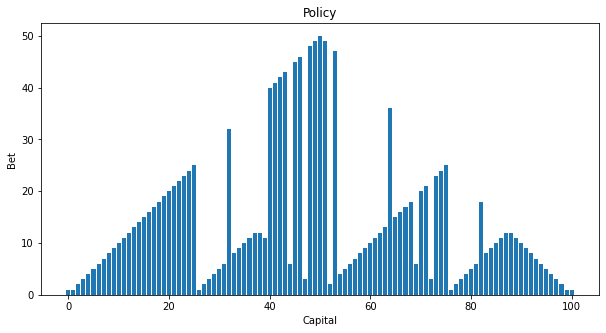

In [9]:
mdp = GamblersProblem(p_win=0.4)
for theta in [10**n for n in range(-15, -5, 1)]:
    value, policy = value_iteration(mdp, theta)
    plot_results(None, policy)